<a href="https://colab.research.google.com/github/gyhou/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/GH_142_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np
import math

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505,2400,3027,2798,3700,3250,2689]

In [0]:
def mean(x):
  return sum(x)/len(x)

In [11]:
sales_mean = mean(sales)
sales_mean

3052.714285714286

In [0]:
def variance(x, ddof=1):
  return sum((xi - mean(x)) ** 2 for xi in x) / (len(x)-ddof)

In [13]:
sales_variance = variance(sales)
sales_variance

183761.06122448976

In [0]:
def stdv(x):
  return variance(x)**.5

In [36]:
sales_stdv = stdv(sales)
sales_stdv

428.67360686714756

In [41]:
np.std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
num_customers = [127,80,105,92,120,115,93]

In [0]:
def covariance(xs, ys, ddof=1): 
    '''take: two lists. They could be an equal number 
    of draws from two random variables, or two features in a dataset.
    return: the covariance
    ''' 
    if len(xs) != len(ys):
        return 'Unequal lengths'

    xs_mean = mean(xs)
    ys_mean = mean(ys)

    sum = 0

    for i in range(0, len(xs)):
        sum += ((xs[i] - xs_mean) * (ys[i] - ys_mean))
        
    # ddof = 0
#     return sum/len(xs)
  
    # ddof = 1
    return sum/(len(xs)-ddof)

In [111]:
store_cov = covariance(sales, num_customers)
store_cov

7604.357142857142

In [49]:
np.cov(sales, num_customers)[0][1]

7604.357142857142

In [44]:
np.cov(sales, num_customers, ddof=0)[0][1]

6518.020408163265

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [37]:
customers_stdv = stdv(num_customers)
customers_stdv

15.792015549069118

In [43]:
np.std(num_customers)

15.792015549069118

In [0]:
def correlation(xs, ys): 
    '''take: two lists, as above. 
    return: pearson's correlation coefficient'''
    return covariance(xs, ys) / (stdv(xs) * stdv(ys))

In [113]:
r_store = correlation(sales,num_customers)
r_store

0.9628339778148909

In [51]:
np.corrcoef(sales,num_customers)[0][1]

0.9628339778148909

In [40]:
from scipy.stats import linregress
linregress(sales, num_customers)
# r-value = correlation coefficient

LinregressResult(slope=0.035470084710713515, intercept=-3.7086057404624455, rvalue=0.9628339778148909, pvalue=0.0005013220403169378, stderr=0.004449801521405344)

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [58]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
df.ticket.value_counts()

In [56]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [54]:
# df.select_dtypes(include=np.number).columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['Unnamed: 0', 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare',
       'body', 'has_cabin_number'],
      dtype='object')

In [57]:
# variance-covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [64]:
# correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

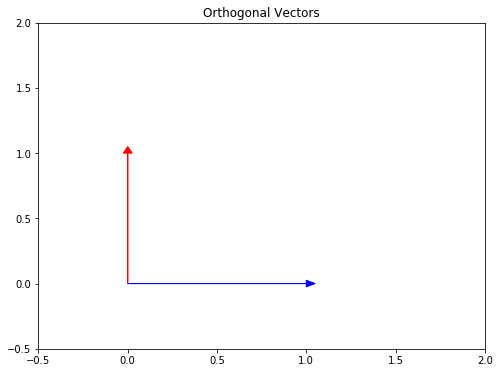

In [67]:
# orthogonal = perpendicular
# dot product between 2 vectors = 0

a = [1,0]
b = [0,1]

fig, ax = plt.subplots(figsize=(8,6))


plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], head_width=.05, head_length=0.05, color ='red')

plt.xlim(-.5,2)          
plt.ylim(-.5,2)
plt.title("Orthogonal Vectors")
plt.show()

In [68]:
np.dot(a,b)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [78]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

# no, the dot product != 0

-40

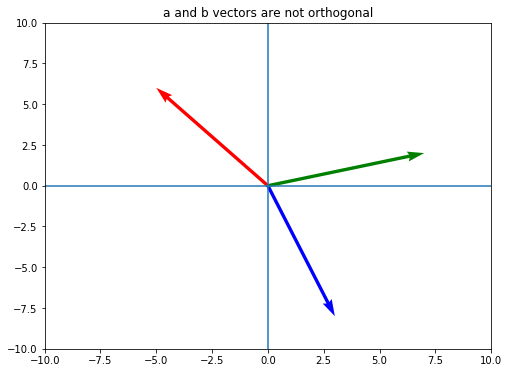

In [79]:
fig, ax = plt.subplots(figsize=(8,6))

origin = [0], [0]
plt.quiver(*origin, a, b, angles='xy', scale_units='xy'
           , color=['r','b','g'], scale=1)

plt.xlim(-10,10)
plt.ylim(-10,10)
ax.axhline(y=0)
ax.axvline(x=0)

plt.title("a and b vectors are not orthogonal")
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 665

## What is $c \cdot c$? 665

## What is $c^{T}c$? 665

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
def norm(xs):
  return sum([x**2 for x in xs])**.5

In [97]:
c = np.array([2,-15,6,20])
print(norm(c)**2)
print(np.dot(c,c))
print(np.dot(c.T,c))
# quantities all the same

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}
\begin{align}
c = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
def unit(xs):
  return xs / norm(xs)

In [95]:
f = np.array([4,12,11,9,2])
# unit vector
unit(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [114]:
norm(unit(f))

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

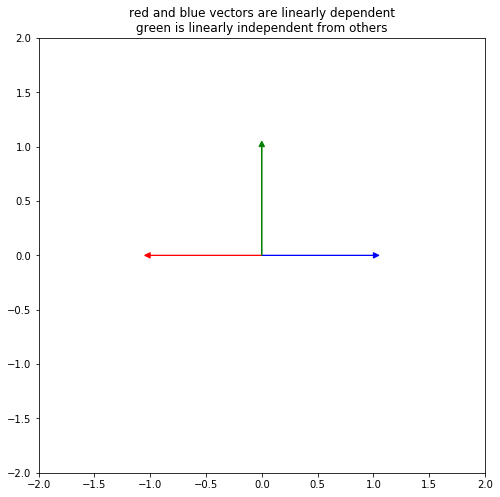

In [107]:
fig, ax = plt.subplots(figsize=(8,8))

origin = [0], [0]

a = [1,0]
b = [-1,0]
c = [0,1]

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, c[0], c[1], head_width=.05, head_length=0.05, color ='green')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.title("red and blue vectors are linearly dependent\ngreen is linearly independent from others")
plt.show()

# Span

If the span of n vectors has dimension p, then p of these vectors span the space and there is a set of p coordinates on which they are linearly indepenedent.

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [109]:
# Linearly Dependent Vectors
# rank = 1
g = [1,2]        = [1,2]
h = [4,8]+(g*-4) = [0,0]

LinregressResult(slope=4.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

#### $\{g,h\}$ can span $\mathbb{R}$ with Rank = 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# All linearly indepenedent vectors
# rank = 3
l = [1,2,3]  = [1,2.3]
m = [-1,0,7] = [0,1,5]
n = [4,8,2]  = [0,0,1]

#### $\{l, m, n\}$ can span $\mathbb{R}^3$ with Rank = 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



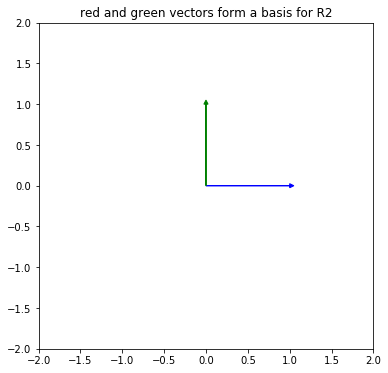

In [117]:
fig, ax = plt.subplots(figsize=(6,6))

origin = [0], [0]

a = [1,0]
c = [0,1]

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, c[0], c[1], head_width=.05, head_length=0.05, color ='green')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.title("red and green vectors form a basis for R2")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space  V  is a set of vectors that are linearly independent and that span the vector space  V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

Rank of a matrix tell us what space of $\mathbb{R}$ it can span over.

# Linear Projections (Stretch Goal)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

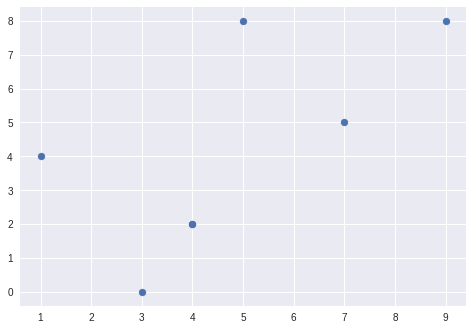

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()